# CUSTOMER CHURN PREDICTION MODEL 


In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


## 1. Importing Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 
%matplotlib inline


## 2. Loading the Dataset

In [4]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## 3.EDA

In [7]:
df.shape

(7043, 21)

In [8]:
df.size

147903

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.duplicated().sum()

0

In [13]:
df = df.drop(columns=['customerID'])


In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df['TotalCharges'].dtype

dtype('O')

In [16]:
#conversion of totalcharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')


In [17]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#imputation by taking median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [19]:
df['TotalCharges'].dtype

dtype('float64')

In [20]:
categorical_features=[
"gender",
"SeniorCitizen",
"Partner",            
"Dependents",              
"PhoneService",       
"MultipleLines",    
"InternetService",    
"OnlineSecurity",    
"OnlineBackup",     
"DeviceProtection",    
"TechSupport",     
"StreamingTV",      
"StreamingMovies",   
"Contract",     
"PaperlessBilling",  
"PaymentMethod"]

numerical_features=["tenure","MonthlyCharges","TotalCharges"]   

### Checking class distribution of  target column

In [21]:
print (df['Churn'].value_counts())
#imbalanced data

Churn
No     5174
Yes    1869
Name: count, dtype: int64


### Numerical Features -Analysis

In [22]:
df.skew(numeric_only=True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

In [23]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


Feature Distribution

In [24]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

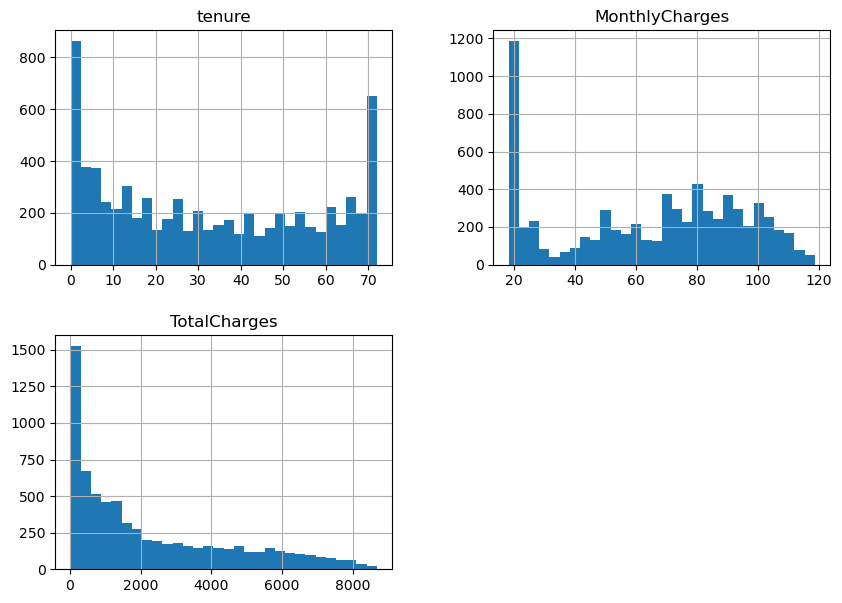

In [25]:
df[numerical_features].hist(bins=30,figsize=(10,7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

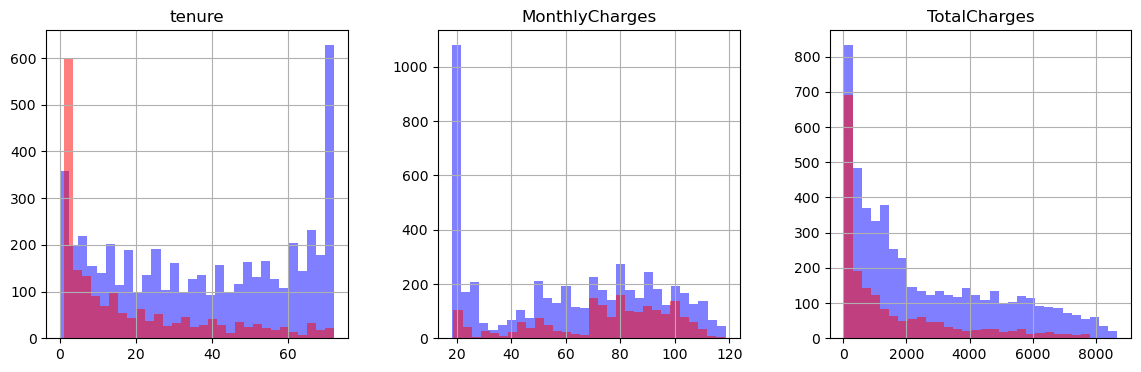

In [26]:
fig,ax=plt.subplots(1,3,figsize=(14,4))
df[df.Churn=='No'][numerical_features].hist(bins=30,color="blue",alpha=0.5,ax=ax)
df[df.Churn=='Yes'][numerical_features].hist(bins=30,color="red",alpha=0.5,ax=ax)

In [27]:

def plot_histogram(df, column_name):
    
    print(f"Plotting histogram for column: {column_name}")

    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    # Calculate mean and median
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    # Add vertical lines
    plt.axvline(col_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(col_median, color='green', linestyle='-', label='Median')

   
    plt.legend()
    plt.show()



Plotting histogram for column: tenure


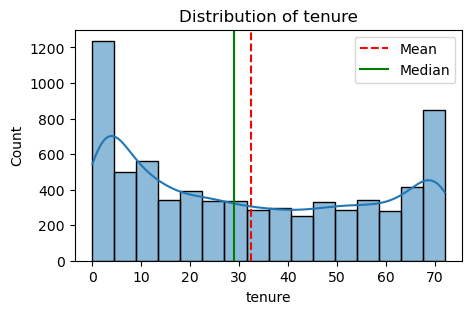

In [28]:
plot_histogram(df, "tenure")

Plotting histogram for column: MonthlyCharges


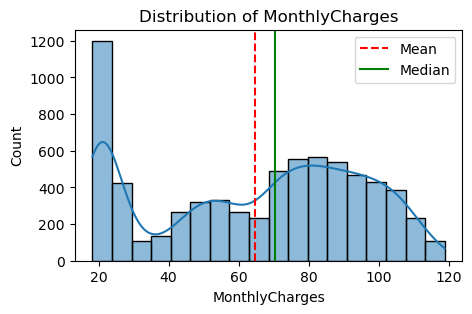

In [29]:
plot_histogram(df, "MonthlyCharges")

Plotting histogram for column: TotalCharges


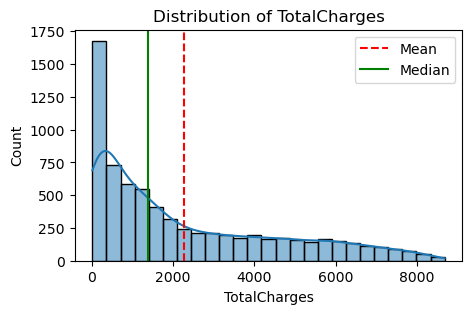

In [30]:
plot_histogram(df, "TotalCharges")

### Box plot for numerical features

In [31]:

def plot_boxplot(df, column_name):
    
    print(f"Plotting histogram for column: {column_name}")

    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box plot  of {column_name}")

    plt.ylabel(column_name)
    plt.show


Plotting histogram for column: tenure


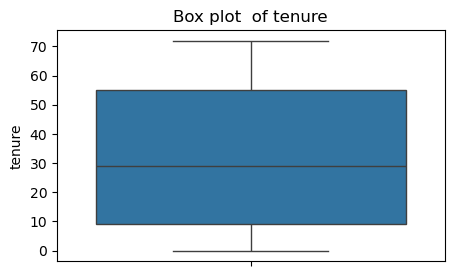

In [32]:
plot_boxplot(df,'tenure')

Plotting histogram for column: TotalCharges


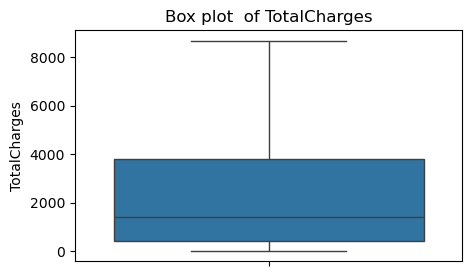

In [33]:
plot_boxplot(df,'TotalCharges')

Plotting histogram for column: MonthlyCharges


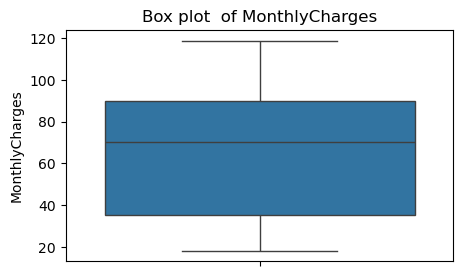

In [34]:
plot_boxplot(df,'MonthlyCharges')

### Correlation Heatmap for numerical columns 

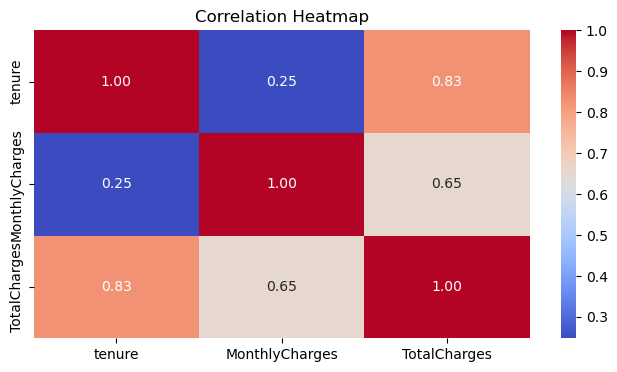

In [35]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Categorical Features - Analysis

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


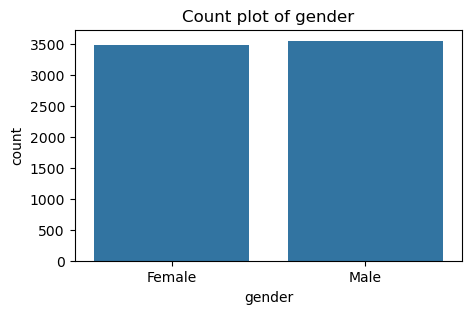

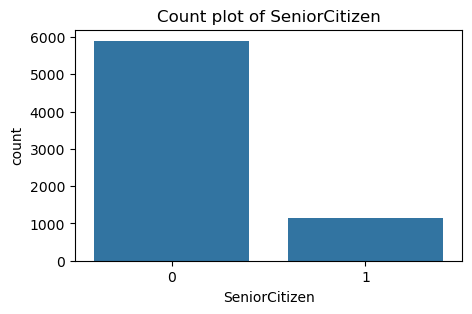

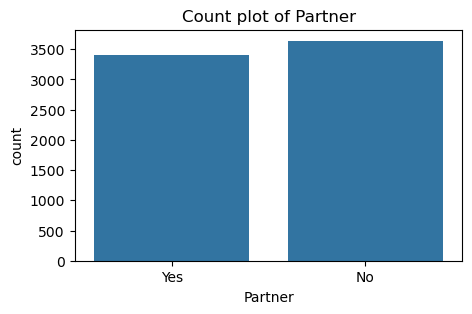

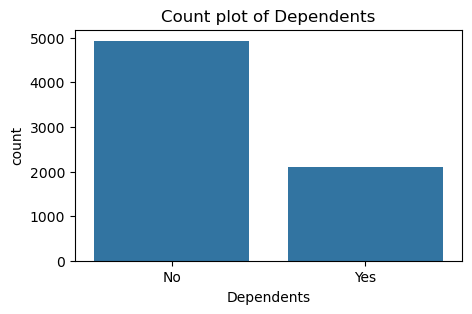

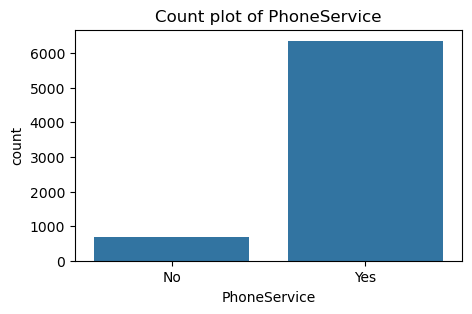

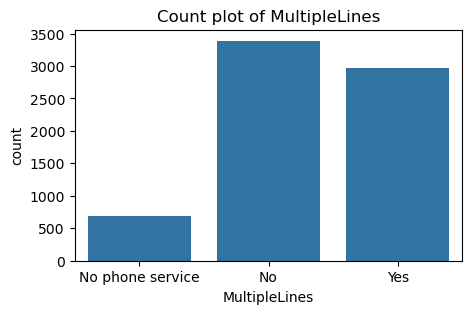

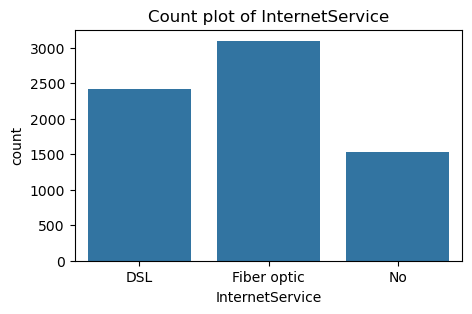

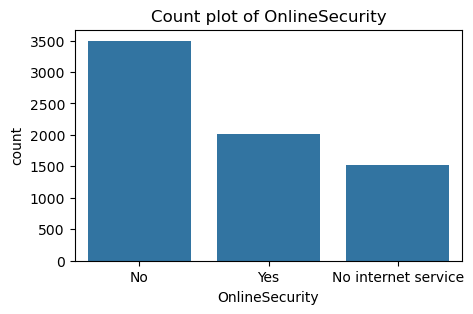

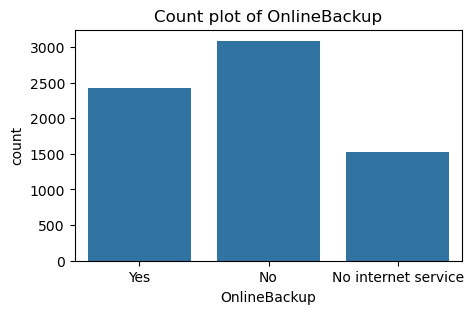

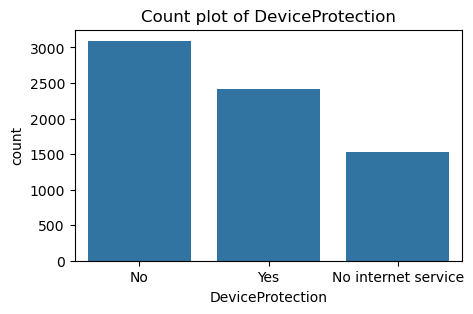

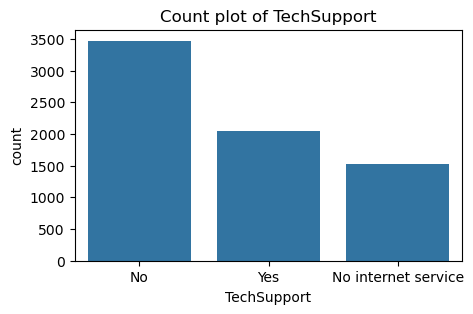

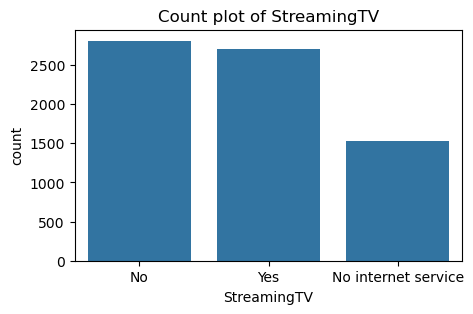

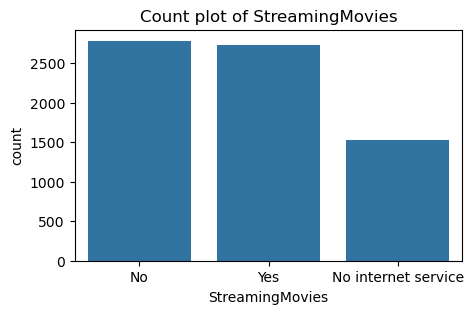

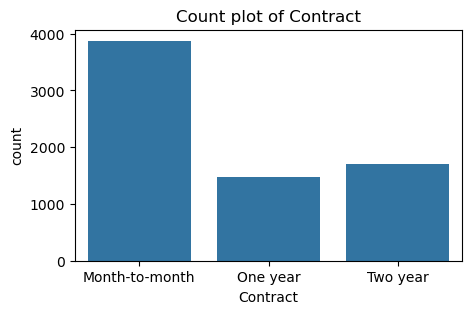

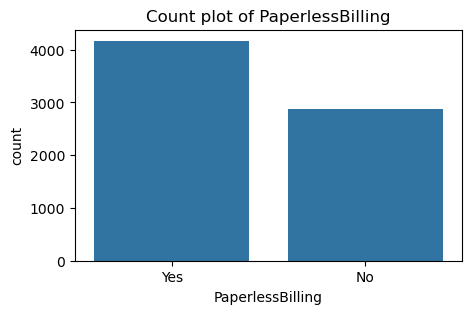

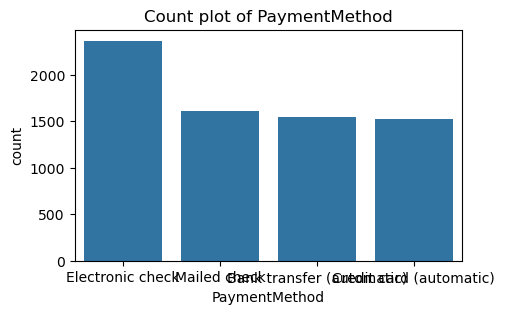

In [37]:
for col in categorical_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()

# 4. Data Preprocessing

In [38]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Label Encoding for cateogrical features

In [39]:
unique_values = df['Contract'].unique()

print(unique_values)

['Month-to-month' 'One year' 'Two year']


In [40]:
df_encoded = df.copy()
label_encoders = {}

for col in categorical_features:
    if col != "Churn":  # Exclude the target column
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le




In [41]:
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

In [42]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [43]:
# Encode target column separately (if it's categorical)
df_encoded["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})  # Adjust mapping as needed

In [44]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [45]:
print(df.info())  # Look for object-type columns that were encoded


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [46]:
#Convert Target variable
df_encoded['Churn'] = df_encoded['Churn'].replace({"Yes": 1, "No": 0})

### Splitting the training and testing data

In [47]:
#splitting the features and target
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
print(y_train.shape)

(5634,)


In [49]:
 print(y_train.value_counts())

Churn
0    4139
1    1495
Name: count, dtype: int64


### Synthetic Minority OverSampling Technique (SMOTE)

In [50]:
#we apply smote after splitting 
#smote doesnt work with missing values
smote = SMOTE(random_state=42)


In [51]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [52]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# 5. Model Training

### Training with default hyperparameters

In [53]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}


In [54]:

cv_scores = {}
trained_models = {}

for model_name, model in models.items():
    print(f"Training {model_name} with optimized parameters")
    
    # Train & Store Model
    model.fit(X_train_resampled, y_train_resampled)
    trained_models[model_name] = model
    
    # Cross-validation
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.4f}")
    print("-" * 70)


Training Decision Tree with optimized parameters
Decision Tree cross-validation accuracy: 0.7917
----------------------------------------------------------------------
Training Random Forest with optimized parameters
Random Forest cross-validation accuracy: 0.8184
----------------------------------------------------------------------
Training XGBoost with optimized parameters
XGBoost cross-validation accuracy: 0.8304
----------------------------------------------------------------------


## MODEL SELECTION

In [55]:
cv_scores

{'Decision Tree': array([0.73671498, 0.74396135, 0.84601449, 0.82356495, 0.80845921]),
 'Random Forest': array([0.76268116, 0.76992754, 0.86956522, 0.85317221, 0.83685801]),
 'XGBoost': array([0.73248792, 0.75181159, 0.89915459, 0.89063444, 0.87794562])}

XGBoost  gives the highest accuracy compared to other models with deafult parameters

In [56]:
from xgboost import XGBClassifier




xgb = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric="logloss",
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),  # Balances the classes
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200
)
xgb.fit(X_train, y_train)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:07:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [57]:
# Now predict on test data
y_pred = xgb.predict(X_test)

In [58]:
print(y_test.value_counts())

Churn
0    1035
1     374
Name: count, dtype: int64


# 6. Model Evaluation

In [59]:
#evaluate on test data
best_model = trained_models["XGBoost"]  # Ensure you are using the correct model
y_test_pred = best_model.predict(X_test)

print("Accuracy Score :\n",accuracy_score(y_test,y_test_pred))
print("Confusion Maxtrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy Score :
 0.765791341376863
Confusion Maxtrix:
 [[848 187]
 [143 231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.55      0.62      0.58       374

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



In [60]:
#save the trained model as a pickle file
model_data={"model":xgb,"features_names": X.columns.tolist()}
with open("customer_churn_model.pkl","wb")as f:
    pickle.dump(xgb,f)


print("Model saved to 'xgb_model.pkl'.")

Model saved to 'xgb_model.pkl'.


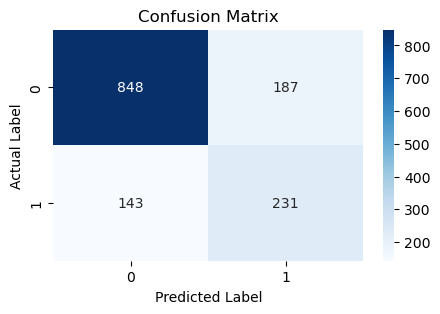

In [61]:
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])  # Fit using training data


StandardScaler()

# 6. Model Prediction

In [65]:
# Assume these are the names of your numerical features and the columns used during training
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
training_columns = X_train.columns  # Or replace with your list of training columns

# Create a new data sample with all required features
new_data = pd.DataFrame({
    'tenure': [12],
    'MonthlyCharges': [50],
    'TotalCharges': [600],
    'gender': [1],            # Example encoded value (e.g., Male=1, Female=0)
    'SeniorCitizen': [0],
    'Partner': [1],
    'Dependents': [0],
    'PhoneService': [1],
    'MultipleLines': [0],
    'InternetService': [2],   # Example encoded value
    'OnlineSecurity': [0],
    'OnlineBackup': [1],
    'DeviceProtection': [0],
    'TechSupport': [1],
    'StreamingTV': [0],
    'StreamingMovies': [1],
    'Contract': [1],
    'PaperlessBilling': [1],
    'PaymentMethod': [2]
})

# Reindex to ensure the new_data has the same columns as used during training
new_data = new_data.reindex(columns=training_columns, fill_value=0)

# Apply the scaling transformation to the numerical features
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

import pickle

with open("customer_churn_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


# Get prediction probabilities using predict_proba
probabilities = loaded_model.predict_proba(new_data)

# The output probabilities are given per class; for binary classification,
# the first column is usually the probability for class 0 (No) and the second for class 1 (Yes)
print("Prediction Probabilities:", probabilities)
new_prediction = loaded_model.predict(new_data)
print("🔹 Churn Prediction:", "Yes" if new_prediction[0] == 1 else "No")

Prediction Probabilities: [[0.7889452 0.2110548]]
🔹 Churn Prediction: No


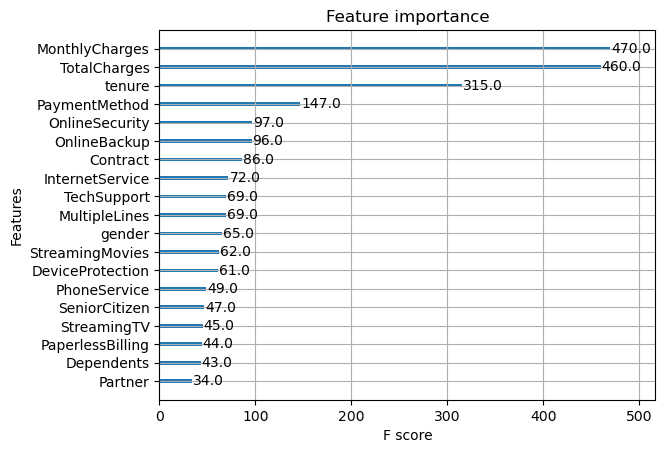

In [66]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_model)
plt.show()


In [73]:
print("Total Features Before Feature Selection:", X_train.shape[1])


Total Features Before Feature Selection: 19


###### pip install shap

In [88]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_tuned = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_distributions=param_grid,
    cv=5,
    n_iter=10,
    scoring="accuracy",
    n_jobs=-1
)

xgb_tuned.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", xgb_tuned.best_params_)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:25:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:25:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:25:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:25:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [89]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid based on the best values
param_grid = {
    'n_estimators': [200, 300, 400],  # Test around the best value
    'max_depth': [5, 7, 9],  # Check if increasing depth helps
    'learning_rate': [0.05, 0.1, 0.15],  # Test slightly lower/higher values
    'colsample_bytree': [0.7, 0.8, 0.9],  # Feature selection
    'subsample': [0.7, 0.8, 0.9]  # Sample selection
}

# Initialize the XGBClassifier
xgb = XGBClassifier(
    random_state=42, 
    eval_metric="logloss",
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # Handle class imbalance
)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

# Fit the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

# Use the best model
best_xgb = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.6s
[

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:40:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


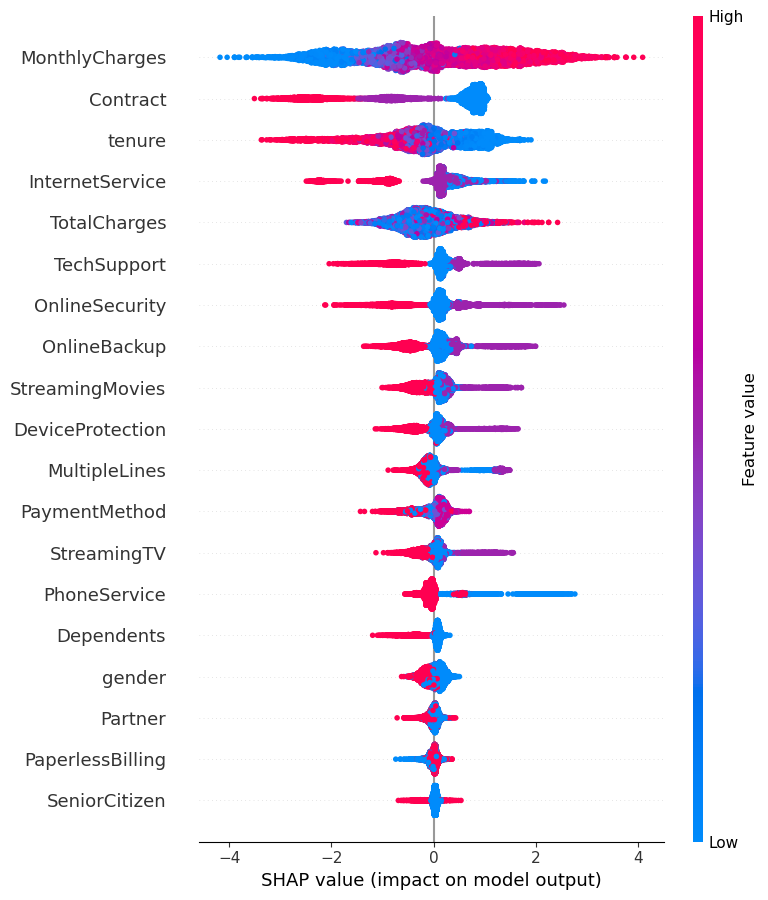

In [90]:
import shap

# Fit the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train_resampled, y_train_resampled)

# Use SHAP Explainer
explainer = shap.Explainer(xgb)
shap_values = explainer(X_train_resampled)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train_resampled)


In [91]:
# Get mean absolute SHAP values
shap_importance = pd.DataFrame({
    'feature': X_train_resampled.columns,
    'shap_value': np.abs(shap_values.values).mean(axis=0)
})

# Sort features by importance
shap_importance = shap_importance.sort_values(by="shap_value", ascending=False)

# Select top N features (e.g., top 10)
top_features = shap_importance.head(14)['feature'].tolist()
print("Top Features Based on SHAP:", top_features)

# Use only selected features for training
X_train_shap = X_train_resampled[top_features]
X_test_shap = X_test[top_features]

# Train the model with selected features
xgb.fit(X_train_shap, y_train_resampled)

# Evaluate performance
y_pred = xgb.predict(X_test_shap)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy after SHAP Feature Selection:", accuracy)


Top Features Based on SHAP: ['MonthlyCharges', 'Contract', 'tenure', 'InternetService', 'TotalCharges', 'TechSupport', 'OnlineSecurity', 'OnlineBackup', 'StreamingMovies', 'DeviceProtection', 'MultipleLines', 'PaymentMethod', 'StreamingTV', 'PhoneService']
Model Accuracy after SHAP Feature Selection: 0.7771469127040455


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Baseline Model (Logistic Regression) Results:
Accuracy: 0.7488
Confusion Matrix:
 [[788 247]
 [107 267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1035
           1       0.52      0.71      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.75      0.76      1409

AUC-ROC Score: 0.8174

🔹 XGBoost Model Results:
Accuracy: 0.7658
Confusion Matrix:
 [[848 187]
 [143 231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.55      0.62      0.58       374

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409

AUC-ROC Score: 0.8316


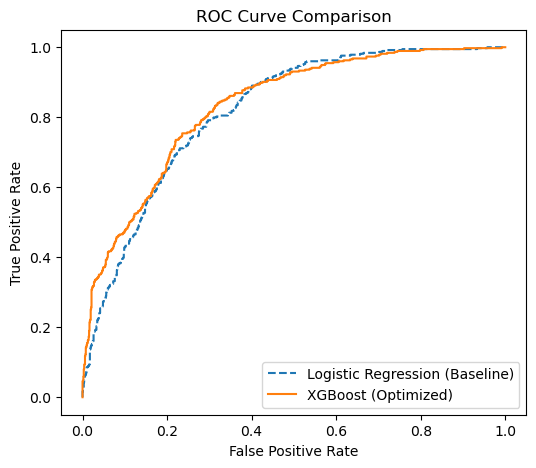

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 1️⃣ Train the Baseline Model (Logistic Regression)
baseline_model = LogisticRegression(max_iter=500, random_state=42)
baseline_model.fit(X_train_resampled, y_train_resampled)  # Use resampled training data

# 2️⃣ Make Predictions
y_pred_baseline = baseline_model.predict(X_test)

# 3️⃣ Evaluate Performance
print("🔹 Baseline Model (Logistic Regression) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))
print(f"AUC-ROC Score: {roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1]):.4f}")

# 4️⃣ Compare with XGBoost Model
y_pred_xgb = best_model.predict(X_test)  # Best XGBoost model you trained

print("\n🔹 XGBoost Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print(f"AUC-ROC Score: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]):.4f}")

# 5️⃣ Visual Comparison Using ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_base, tpr_base, _ = roc_curve(y_test, baseline_model.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(6, 5))
plt.plot(fpr_base, tpr_base, label="Logistic Regression (Baseline)", linestyle="--")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (Optimized)", linestyle="-")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [93]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Perform RFE (Choose how many features you want, e.g., 10)
rfe = RFE(estimator=logreg, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Get Selected Features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected Features from RFE:", selected_features_rfe.tolist())


Selected Features from RFE: ['SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [94]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize Data (LASSO is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit LASSO Model
lasso = Lasso(alpha=0.01)  # Adjust alpha to control feature selection
lasso.fit(X_train_scaled, y_train)

# Get Selected Features
selected_features_lasso = X_train.columns[lasso.coef_ != 0]
print("Selected Features from LASSO:", selected_features_lasso.tolist())


Selected Features from LASSO: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

# Filter dataset with selected features (Change to selected_features_lasso if using LASSO)
X_train_selected = X_train[selected_features_lasso]
X_test_selected = X_test[selected_features_lasso]

# Train XGBoost on Selected Features
xgb_model = XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.1, colsample_bytree=0.8, subsample=0.8, random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_selected)
y_pred_proba = xgb_model.predict_proba(X_test_selected)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display Results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"AUC-ROC Score: {roc_auc:.4f}")


Accuracy: 0.7864
Confusion Matrix:
 [[911 124]
 [177 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

AUC-ROC Score: 0.8204


In [107]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best parameters
best_params = grid_search.best_params_
print("\n🔹 Best Hyperparameters:", best_params)

# Train the best model
best_xgb = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
best_xgb.fit(X_train_selected, y_train)

# Predictions
y_pred = best_xgb.predict(X_test_selected)
y_pred_proba = best_xgb.predict_proba(X_test_selected)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display Results
print("\n🔹 XGBoost Results after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"AUC-ROC Score: {roc_auc:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits

🔹 Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

🔹 XGBoost Results after Hyperparameter Tuning:
Accuracy: 0.8041
Confusion Matrix:
 [[941  94]
 [182 192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409

AUC-ROC Score: 0.8449
